In [1]:
pip install wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.4 MB/s eta 0:00:00


Total patients: 6823
Patient IDs: [3000003, 3000031, 3000051, 3000060, 3000063, 3000065, 3000086, 3000100, 3000103, 3000105]
['30/3000003/3000003', '30/3000003/3000003n', '30/3000003/3000003_0001', '30/3000003/3000003_0002', '30/3000003/3000003_0003', '30/3000003/3000003_0004', '30/3000003/3000003_0005', '30/3000003/3000003_0006', '30/3000003/3000003_0007', '30/3000003/3000003_0008', '30/3000003/3000003_0009', '30/3000003/3000003_0010', '30/3000003/3000003_0011', '30/3000003/3000003_0012', '30/3000003/3000003_0013', '30/3000003/3000003_0014', '30/3000003/3000003_0015', '30/3000003/3000003_0016', '30/3000003/3000003_0017', '30/3000031/3000031n', '30/3000051/3000051', '30/3000051/3000051_0001', '30/3000051/3000051_0002', '30/3000051/3000051_0003', '30/3000060/3000060', '30/3000060/3000060n', '30/3000060/3000060_0001', '30/3000060/3000060_0002', '30/3000060/3000060_0003', '30/3000060/3000060_0004', '30/3000060/3000060_0005', '30/3000060/3000060_0006', '30/3000060/3000060_0007', '30/300006

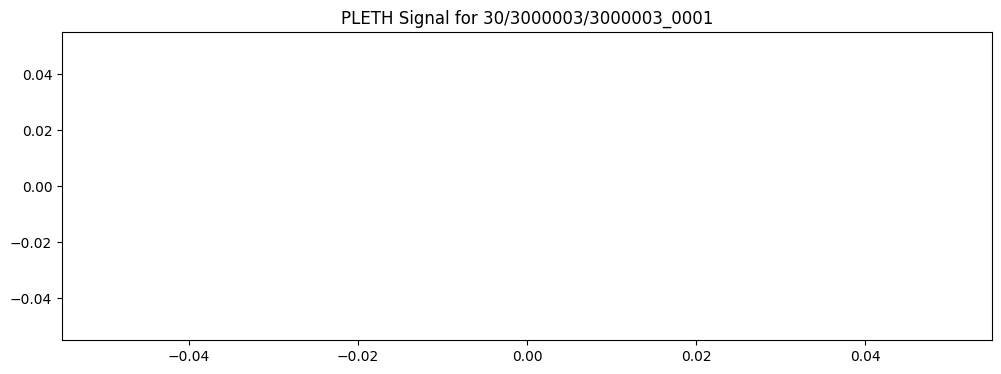

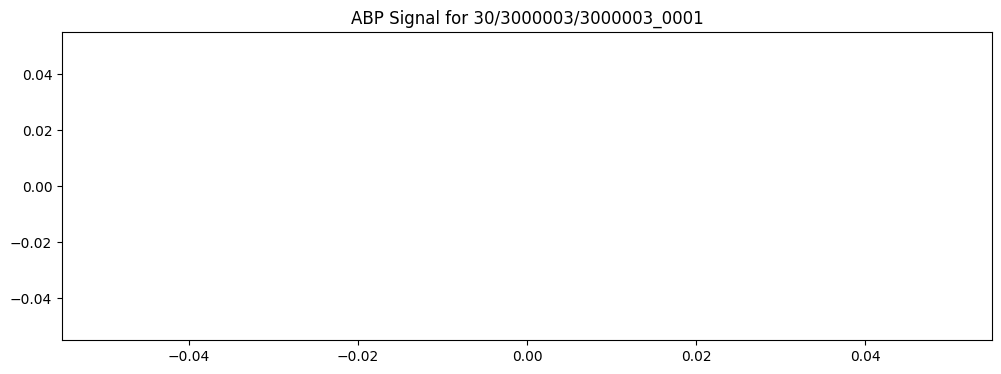

In [4]:
import urllib.request
import pandas as pd
import wfdb
import os
import matplotlib.pyplot as plt

# Constants
DIR = 30
BASE_URL = f"https://physionet.org/files/mimic3wdb/1.0/{DIR}/RECORDS"

def fetch_records(url):
    """Fetch the RECORDS file content from the URL."""
    try:
        with urllib.request.urlopen(url) as response:
            return [line.decode('utf-8').strip() for line in response.readlines()]
    except Exception as e:
        print(f"Error fetching records from {url}: {e}")
        return []

def extract_numbers(lines):
    """Extract numeric IDs from a list of lines."""
    return [int("".join(filter(str.isdigit, line))) for line in lines]

def process_patient_list(patient_list, limit=10):
    """Process a limited number of patients and fetch their records."""
    plist = []
    for rec in patient_list[:limit]:  # Limit to first 10 patients
        patient_dir = f"{DIR}/{rec}"
        patient_url = f"https://physionet.org/files/mimic3wdb/1.0/{patient_dir}/RECORDS"

        try:
            records = fetch_records(patient_url)
            plist.extend([f"{patient_dir}/{record}" for record in records])
        except Exception as e:
            print(f"Error fetching patient records for {rec}: {e}")

    return plist

def process_signals_and_numerics(patient_records):
    """Split patient records into signal and numeric data."""
    signals = [rec for rec in patient_records if "_" in rec]
    numerics = [rec for rec in patient_records if rec.endswith('n')]
    return signals, numerics

def fetch_and_plot_data(signal, numeric, patient_dir):
    """Fetch and process signal and numeric data, then plot."""
    try:
        # Fetch signal data
        signal_data, signal_fields = wfdb.rdsamp(
            f"mimic3wdb/{signal}", pn_dir=f"mimic3wdb/{patient_dir}", channel_names=["PLETH", "ABP"]
        )
        print(f"Fetched signal data for {signal}")

        # Fetch numeric data
        numeric_data, numeric_fields = wfdb.rdsamp(
            f"mimic3wdb/{numeric}", pn_dir=f"mimic3wdb/{patient_dir}", channel_names=["HR", "ABP Sys", "ABP Dias", "ABP Mean"]
        )
        print(f"Fetched numeric data for {numeric}")

        # Convert signals to DataFrame for plotting
        df_signals = pd.DataFrame(signal_data, columns=["PLETH", "ABP"])

        # Plot signal
        plt.figure(figsize=(12, 4))
        plt.title(f"PLETH Signal for {signal}")
        plt.plot(df_signals["PLETH"])
        plt.show()

        plt.figure(figsize=(12, 4))
        plt.title(f"ABP Signal for {signal}")
        plt.plot(df_signals["ABP"])
        plt.show()

        return signal_data, numeric_data

    except Exception as e:
        print(f"Error processing data for {signal} and {numeric}: {e}")
        return None, None

# Main Execution
if __name__ == "__main__":
    # Fetch all records
    all_records = fetch_records(BASE_URL)
    patient_list = extract_numbers(all_records)

    print(f"Total patients: {len(patient_list)}")
    print(f"Patient IDs: {patient_list[:10]}")

    # Process the first 10 patients
    patient_records = process_patient_list(patient_list, limit=10)
    print(patient_records)
    print(f"Total records fetched: {len(patient_records)}")

    # Split into signals and numerics
    signals, numerics = process_signals_and_numerics(patient_records)
    print(f"Signals: {signals[:5]}")
    print(f"Numerics: {numerics[:5]}")

    # Process and plot data for the first patient
    if signals and numerics:
        fetch_and_plot_data(signals[0], numerics[0], f"{DIR}/{patient_list[0]}")


In [ ]:
import urllib.request
import pandas as pd
import wfdb
import os
import matplotlib.pyplot as plt

# Constants
DIR = 30
BASE_URL = f"https://physionet.org/files/mimic3wdb/1.0/{DIR}/RECORDS"

def fetch_records(url):
    """Fetch the RECORDS file content from the URL."""
    try:
        with urllib.request.urlopen(url) as response:
            return [line.decode('utf-8').strip() for line in response.readlines()]
    except Exception as e:
        print(f"Error fetching records from {url}: {e}")
        return []

def extract_numbers(lines):
    """Extract numeric IDs from a list of lines."""
    return [int("".join(filter(str.isdigit, line))) for line in lines]

def process_patient_list(patient_list):
    """Process a limited number of patients and fetch their records."""
    plist = []
    for rec in patient_list:  # Limit to first 10 patients
        patient_dir = f"{DIR}/{rec}"
        patient_url = f"https://physionet.org/files/mimic3wdb/1.0/{patient_dir}/RECORDS"

        try:
            records = fetch_records(patient_url)
            plist.extend([f"{patient_dir}/{record}" for record in records])
        except Exception as e:
            print(f"Error fetching patient records for {rec}: {e}")

    return plist

def process_signals_and_numerics(patient_records):
    """Split patient records into signal and numeric data."""
    signals = [rec for rec in patient_records if "_" in rec]
    numerics = [rec for rec in patient_records if rec.endswith('n')]
    return signals, numerics


def is_valid_signals(ppg_signal, abp_signal, fs, duration=5, sub_window_duration=20, tolerance=0.0):
    """
    Check if both PPG and ABP signals have a clean aligned 5-minute interval.
    - Splits the window into sub-windows (default: 20 seconds).
    - Rejects the entire 5-minute window if any sub-window is a flatline.

    Parameters:
    - ppg_signal: The PPG signal array.
    - abp_signal: The ABP signal array.
    - fs: Sampling frequency (in Hz).
    - duration: Total duration of the window to check (in minutes).
    - sub_window_duration: Duration of each sub-window (in seconds).
    - tolerance: Float, permissible deviation for flatline detection.

    Returns:
    - (bool, tuple): (Validity of window, (start_idx, end_idx) of the valid window)
    """
    min_samples = duration * 60 * fs
    sub_window_samples = sub_window_duration * fs

    if len(ppg_signal) < min_samples or len(abp_signal) < min_samples:
        return False, None

    for start_idx in range(0, len(ppg_signal) - min_samples + 1, fs * 60):  # Slide 1-minute steps
        ppg_window = ppg_signal[start_idx : start_idx + min_samples]
        abp_window = abp_signal[start_idx : start_idx + min_samples]

        # Divide into sub-windows and check for flatlines
        is_valid = True
        for sub_start in range(0, min_samples, sub_window_samples):
            ppg_sub = ppg_window[sub_start : sub_start + sub_window_samples]
            abp_sub = abp_window[sub_start : sub_start + sub_window_samples]

            if (
                np.std(ppg_sub) <= tolerance or np.std(abp_sub) <= tolerance or
                np.isnan(ppg_sub).any() or np.isnan(abp_sub).any()
            ):
                is_valid = False
                break

        if is_valid:
            return True, (start_idx, start_idx + min_samples)

    return False, None

def align_signals(ppg_signal, abp_signal):
    """
    Align PPG and ABP signals using cross-correlation.
    """
    # Compute cross-correlation
    correlation = np.correlate(ppg_signal, abp_signal, mode='full')
    lag = np.argmax(correlation) - len(abp_signal) + 1

    # Align signals
    if lag > 0:
        aligned_ppg = ppg_signal[lag:]
        aligned_abp = abp_signal[:len(aligned_ppg)]
    elif lag < 0:
        aligned_abp = abp_signal[-lag:]
        aligned_ppg = ppg_signal[:len(aligned_abp)]
    else:
        aligned_ppg, aligned_abp = ppg_signal, abp_signal

    return aligned_ppg, aligned_abp, lag


def process_signals_for_one_patient(patient_id, signals, fs=125, duration=5):
    """
    Process all signals for a single patient.
    Returns the first clean 5-minute aligned segment for both PPG and ABP signals if found.
    """
    for signal_path in signals:
        try:
            #analyzing model by extracting a single patient record
            signals, fields = wfdb.rdsamp(f"mimic3wdb/{signal_path}",
                              pn_dir=f"mimic3wdb/{DIR}/{patient_id}",
                                     channel_names = ["PLETH", "ABP"])

            # Check for required signals and sampling frequency
            if fields["fs"] != fs or "PLETH" not in fields["sig_name"] or "ABP" not in fields["sig_name"]:
                continue

            ppg_idx = fields["sig_name"].index("PLETH")
            abp_idx = fields["sig_name"].index("ABP")

            ppg_signal = signals[:, ppg_idx]
            abp_signal = signals[:, abp_idx]

            # Align the signals using cross-correlation
            ppg_aligned, abp_aligned, lag = align_signals(ppg_signal, abp_signal)
            print(f"Signals aligned with lag of {lag} samples.")

            # Check if there's a valid aligned 5-minute interval
            valid, window = is_valid_signals(ppg_aligned, abp_aligned, fs, duration)
            if valid:
                start, end = window
                print(f"Valid 5-minute interval found for {record_name}.")
                return ppg_aligned[start:end], abp_aligned[start:end]

        except Exception as e:
            print(f"Error processing signal {signal_path}: {e}")
            continue

    return None, None


def main():
    # Fetch all records
    all_records = fetch_records(BASE_URL)
    patient_list = extract_numbers(all_records)
    print(f"Total patients: {len(patient_list)}")

    # Pre-group signals by patient ID
    patient_records = process_patient_list(patient_list)
    signals, numerics = process_signals_and_numerics(patient_records)
    grouped_signals = {patient_id: [sig for sig in signals if f"/{patient_id}/" in sig] for patient_id in patient_list}

    # Prepare output dataset
    combined_data = []
    patient_count = 0
    MAX_PATIENTS = 90

    for patient_id, patient_signals in grouped_signals.items():
        print(f"Processing patient: {patient_id}")

        # Skip if no valid signals
        if not patient_signals:
            print(f"No valid signals for patient {patient_id}")
            continue

        # Get valid PPG and ABP segments
        ppg_segment, abp_segment = process_signals_for_one_patient(patient_id, patient_signals)

        if ppg_segment is not None and abp_segment is not None:
            for i in range(len(ppg_segment)):
                combined_data.append({
                    "Patient ID": patient_id,
                    "PPG": ppg_segment[i],
                    "ABP": abp_segment[i]
                })
            patient_count += 1
            print(f"Valid 5-minute segment saved for patient {patient_id}")

        if patient_count == MAX_PATIENTS:
            break

    OUTPUT_FILE = "clean_ppg_abp_segments.csv"

    # Save combined dataset to a CSV file
    if combined_data:
        df = pd.DataFrame(combined_data)
        df.to_csv(OUTPUT_FILE, index=False)
        print(f"Saved data for {patient_count} patients to {OUTPUT_FILE}")
    else:
        print("No valid data to save.")

if __name__ == "__main__":
    main()


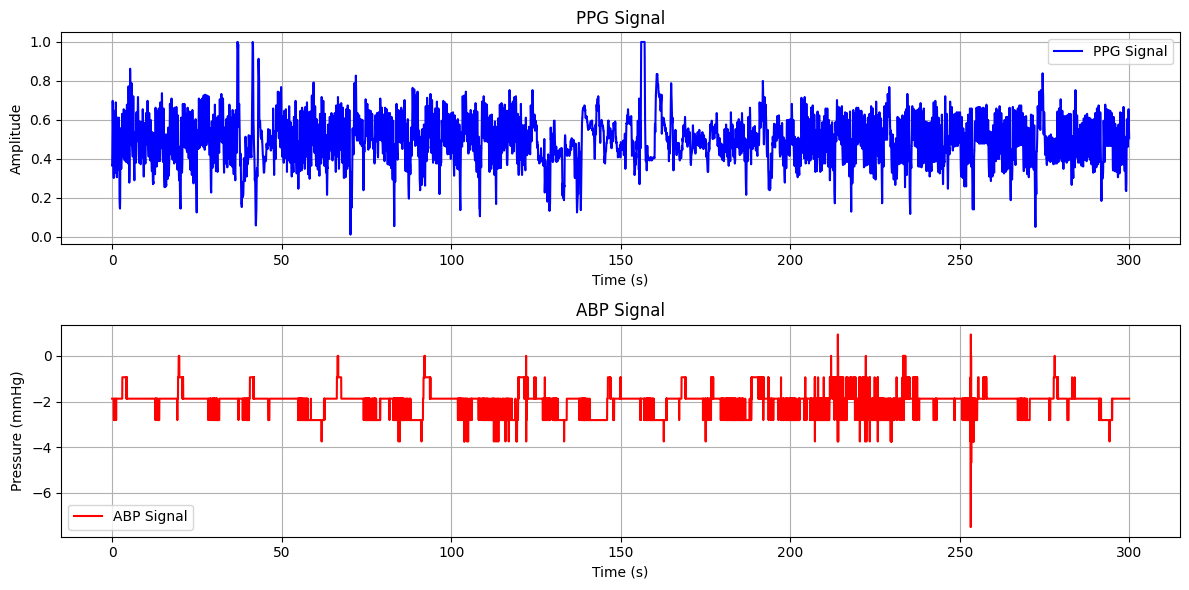

In [5]:
#import libraries
import io
import os
import pandas as pd
import numpy as np
import wfdb
from IPython.display import display
import matplotlib.pyplot as plt

def is_valid_signals(ppg_signal, abp_signal, fs, duration=5, sub_window_duration=20, tolerance=0.0):
    """
    Check if both PPG and ABP signals have a clean aligned 5-minute interval.
    - Splits the window into sub-windows (default: 20 seconds).
    - Rejects the entire 5-minute window if any sub-window is a flatline.

    Parameters:
    - ppg_signal: The PPG signal array.
    - abp_signal: The ABP signal array.
    - fs: Sampling frequency (in Hz).
    - duration: Total duration of the window to check (in minutes).
    - sub_window_duration: Duration of each sub-window (in seconds).
    - tolerance: Float, permissible deviation for flatline detection.

    Returns:
    - (bool, tuple): (Validity of window, (start_idx, end_idx) of the valid window)
    """
    min_samples = duration * 60 * fs
    sub_window_samples = sub_window_duration * fs

    if len(ppg_signal) < min_samples or len(abp_signal) < min_samples:
        return False, None

    for start_idx in range(0, len(ppg_signal) - min_samples + 1, fs * 60):  # Slide 1-minute steps
        ppg_window = ppg_signal[start_idx : start_idx + min_samples]
        abp_window = abp_signal[start_idx : start_idx + min_samples]

        # Divide into sub-windows and check for flatlines
        is_valid = True
        for sub_start in range(0, min_samples, sub_window_samples):
            ppg_sub = ppg_window[sub_start : sub_start + sub_window_samples]
            abp_sub = abp_window[sub_start : sub_start + sub_window_samples]

            if (
                np.std(ppg_sub) <= tolerance or np.std(abp_sub) <= tolerance or
                np.isnan(ppg_sub).any() or np.isnan(abp_sub).any()
            ):
                is_valid = False
                break

        if is_valid:
            return True, (start_idx, start_idx + min_samples)

    return False, None


def process_signals_for_one_patient(patient_id, signals, fs=125, duration=5):
    """
    Process all signals for a single patient.
    Returns the first clean 5-minute aligned segment for both PPG and ABP signals if found.
    """
    for signal_path in signals:
        try:
            #analyzing model by extracting a single patient record
            signals, fields = wfdb.rdsamp('mimic3wdb/30/3000063/3000063_0006',
                              pn_dir='mimic3wdb/30/3000063',
                                     channel_names = ["PLETH", "ABP"])

            # Check for required signals and sampling frequency
            if fields["fs"] != fs or "PLETH" not in fields["sig_name"] or "ABP" not in fields["sig_name"]:
                continue

            ppg_idx = fields["sig_name"].index("PLETH")
            abp_idx = fields["sig_name"].index("ABP")

            ppg_signal = signals[:, ppg_idx]
            abp_signal = signals[:, abp_idx]

            # Check if there's a valid aligned 5-minute interval
            valid, window = is_valid_signals(ppg_signal, abp_signal, fs, duration)
            if valid:
                start, end = window
                return ppg_signal[start:end], abp_signal[start:end]

        except Exception as e:
            print(f"Error processing signal {signal_path}: {e}")
            continue

    return None, None

def plot_signals(ppg_segment, abp_segment, fs=125):
    """
    Plot PPG and ABP signals.
    - ppg_segment: Extracted PPG signal.
    - abp_segment: Extracted ABP signal.
    - fs: Sampling frequency (default: 125 Hz).
    """
    time = np.arange(0, len(ppg_segment)) / fs  # Create time axis in seconds

    # Plot PPG Signal
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(time, ppg_segment, label="PPG Signal", color='blue')
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title("PPG Signal")
    plt.grid()
    plt.legend()

    # Plot ABP Signal
    plt.subplot(2, 1, 2)
    plt.plot(time, abp_segment, label="ABP Signal", color='red')
    plt.xlabel("Time (s)")
    plt.ylabel("Pressure (mmHg)")
    plt.title("ABP Signal")
    plt.grid()
    plt.legend()

    # Show Plots
    plt.tight_layout()
    plt.show()

def main():
      patient_id = 3000003
      signals_data = [
            "30/3000063/3000063_0006"
        ]

      ppg_segment, abp_segment = process_signals_for_one_patient(patient_id, signals_data)

      plot_signals(ppg_segment, abp_segment, fs=125)

if __name__ == "__main__":
    main()


